# import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import *
%matplotlib inline

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
dataset = 'C:\\Users\\SUJAL\\PycharmProjects\\pythonProject2\\diabetes_data_upload.csv'
df = pd.read_csv(dataset)

print(f"Dataset Contains {df.shape[0]} Lines of data\nWith {df.shape[1]} Columns\n")
print("Columns in the Dataset :\n" , [col for col in df.columns])

df.head()

Dataset Contains 520 Lines of data
With 17 Columns

Columns in the Dataset :
 ['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'class']


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [4]:
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

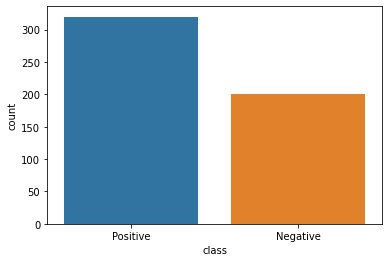

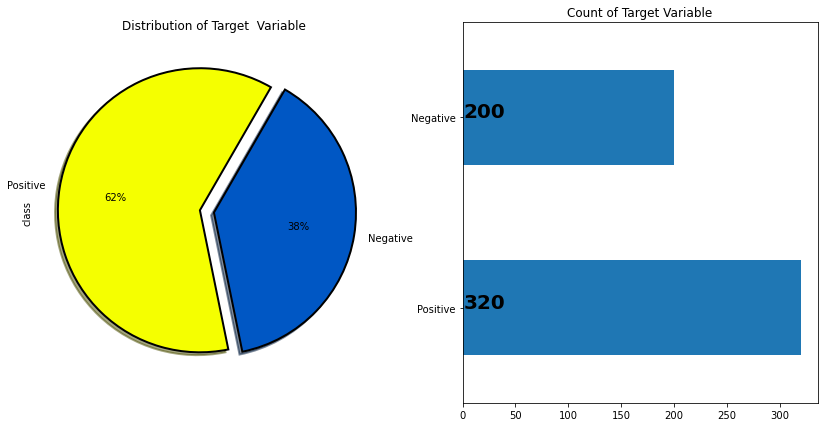

In [6]:
#Distribution of Target Variable
sns.countplot(df['class'],data=df)

# plotting to create pie chart and bar plot as subplots
plt.figure(figsize=(14,7))
plt.subplot(121)
df["class"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["Positive","Negative"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of Target  Variable")

plt.subplot(122)
ax = df["class"].value_counts().plot(kind="barh")

for i,j in enumerate(df["class"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of Target Variable")
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder as le
columns = df.columns[1:]
for label in columns:
    df[label] = le().fit_transform(df[label])

df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [8]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.00,520.00,520.00,520.00,520.00,520.00,520.00,520.00,520.00,520.00,520.00,520.00,520.00,520.00,520.00,520.00,520.00
mean,48.03,0.63,0.50,0.45,0.42,0.59,0.46,0.22,0.45,0.49,0.24,0.46,0.43,0.38,0.34,0.17,0.62
std,12.15,0.48,0.50,0.50,0.49,0.49,0.50,0.42,0.50,0.50,0.43,0.50,0.50,0.48,0.48,0.38,0.49
min,16.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,39.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,47.50,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,57.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00,1.00
max,90.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [9]:
from sklearn.model_selection import train_test_split

features = df.drop(['class'], axis='columns')
labels = df['class']

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, train_size=0.8, shuffle=True, random_state=50)

print(f'Training Set : {train_features.shape[0]}')
print(f'Testing Set : {test_features.shape[0]} ')

Training Set : 416
Testing Set : 104 


In [10]:
models = ["K-Nearest Neighbors", "Logistic Regression", "Decision Tree", "Random Forest", "Support Vector Machine"]
best_test_accuracy = []

In [11]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = [n for n in range(1, 11)]
train_acc = []
test_acc = []

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(train_features, train_labels)
    
#   recording accuracy 
    train_acc.append(knn.score(train_features, train_labels))
    test_acc.append(knn.score(test_features, test_labels))

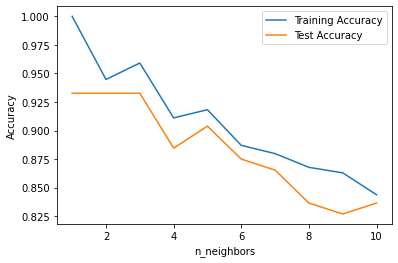

In [13]:
plt.plot(neighbors, train_acc, label="Training Accuracy")
plt.plot(neighbors, test_acc, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_features, train_labels)
train_score = knn.score(train_features, train_labels) * 100
test_score = knn.score(test_features, test_labels) * 100

print(f"Model Accuracy on Training Set : {str(train_score)[:5]}%")
print(f"Model Accuracy on Testing Set : {str(test_score)[:5]}%")

best_test_accuracy.append(test_score)

Model Accuracy on Training Set : 91.82%
Model Accuracy on Testing Set : 90.38%


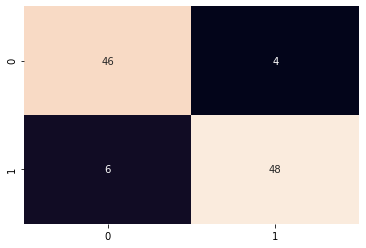

In [17]:
# Creating Heat Map
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
test_pred = knn.predict(test_features)
knncm = confusion_matrix(test_labels, test_pred)
sns.heatmap(knncm, cbar=False, annot=True)
plt.show()

In [18]:
# Classification Report 
print(classification_report(test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        50
           1       0.92      0.89      0.91        54

    accuracy                           0.90       104
   macro avg       0.90      0.90      0.90       104
weighted avg       0.90      0.90      0.90       104



In [19]:
from sklearn.linear_model import LogisticRegression

Cs = [0.01, 0.1, 1, 10, 100]
train_acc = []
test_acc = []

for C in Cs:
    logreg = LogisticRegression(C=C, max_iter=500)
    logreg.fit(train_features, train_labels)
    
#   recording accuracy 
    train_acc.append(logreg.score(train_features, train_labels))
    test_acc.append(logreg.score(test_features, test_labels))

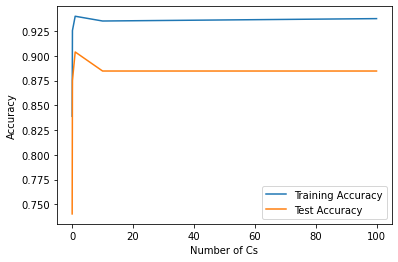

In [21]:
# Plotting Best C

plt.plot(Cs, train_acc, label="Training Accuracy")
plt.plot(Cs, test_acc, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of Cs")
plt.legend()
plt.savefig('logreg_compare_model')

In [22]:
# From Above, 10 Cs Provide Best Training and Testing Accuracy

logreg = LogisticRegression(C=10, max_iter=500)
logreg.fit(train_features, train_labels)
train_score = logreg.score(train_features, train_labels) * 100
test_score = logreg.score(test_features, test_labels) * 100

print(f"Model Accuracy on Training Set : {str(train_score)[:5]}%")
print(f"Model Accuracy on Testing Set : {str(test_score)[:5]}%")

best_test_accuracy.append(test_score)

Model Accuracy on Training Set : 93.50%
Model Accuracy on Testing Set : 88.46%


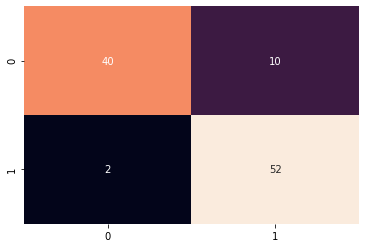

In [23]:
test_pred = logreg.predict(test_features)
lrcm = confusion_matrix(test_labels, test_pred)
sns.heatmap(lrcm, cbar=False, annot=True)

plt.show()

In [24]:
# Classification Report
print(classification_report(test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87        50
           1       0.84      0.96      0.90        54

    accuracy                           0.88       104
   macro avg       0.90      0.88      0.88       104
weighted avg       0.89      0.88      0.88       104



In [25]:
from sklearn.tree import DecisionTreeClassifier

train_acc = []
test_acc = []

# Running Decision Tree on Default Settings 
tree = DecisionTreeClassifier()
tree.fit(train_features, train_labels)
train_acc.append(tree.score(train_features, train_labels))
test_acc.append(tree.score(test_features, test_labels))

print("On Default Settings")
print(f'Training Accuracy : {str(train_acc[0]*100)[:5]}%')
print(f'Testing Accuracy : {str(test_acc[0]*100)[:5]}%')

On Default Settings
Training Accuracy : 100.0%
Testing Accuracy : 95.19%


In [26]:
# Limiting Maximum Depth of the Tree
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(train_features, train_labels)
train_acc.append(tree.score(train_features, train_labels))
test_acc.append(tree.score(test_features, test_labels))
test_score = tree.score(test_features, test_labels) * 100

print("On Limiting Max Depth")
print(f'Training Accuracy : {str(train_acc[1]*100)[:5]}%')
print(f'Testing Accuracy : {str(test_acc[1]*100)[:5]}%')

best_test_accuracy.append(test_score)

On Limiting Max Depth
Training Accuracy : 98.07%
Testing Accuracy : 95.19%


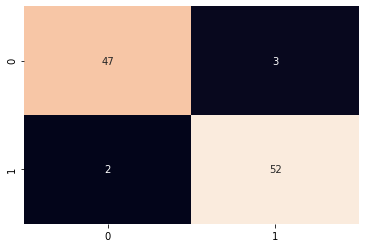

In [27]:
# Plotting Confusion Matrix
test_pred = tree.predict(test_features)
dtccm = confusion_matrix(test_labels, test_pred)
sns.heatmap(dtccm, cbar=False, annot=True)

plt.show()

In [28]:
# Classification Report
print(classification_report(test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        50
           1       0.95      0.96      0.95        54

    accuracy                           0.95       104
   macro avg       0.95      0.95      0.95       104
weighted avg       0.95      0.95      0.95       104



In [29]:
from sklearn.ensemble import RandomForestClassifier

estimators = [10, 20, 30, 50, 100, 200]
train_acc = []
test_acc = []

for estimator in estimators:
    rf = RandomForestClassifier(n_estimators=estimator)
    rf.fit(train_features, train_labels)
    
    train_acc.append(rf.score(train_features, train_labels))
    test_acc.append(rf.score(test_features, test_labels))

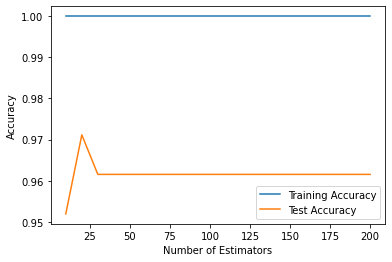

In [30]:
# Plotting Best Estimator

plt.plot(estimators, train_acc, label="Training Accuracy")
plt.plot(estimators, test_acc, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of Estimators")
plt.legend()
plt.savefig('rf_compare_model')

In [31]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(train_features, train_labels)

train_score = rf.score(train_features, train_labels) * 100
test_score = rf.score(test_features, test_labels) * 100

print(f"Model Accuracy on Training Set : {str(train_score)[:5]}%")
print(f"Model Accuracy on Testing Set : {str(test_score)[:5]}%")

best_test_accuracy.append(test_score)

Model Accuracy on Training Set : 100.0%
Model Accuracy on Testing Set : 97.11%


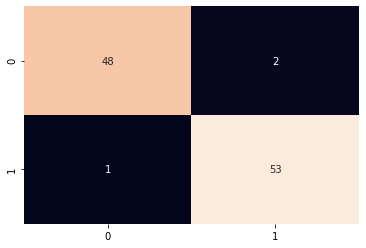

In [33]:
test_pred = rf.predict(test_features)
rfccm = confusion_matrix(test_labels, test_pred)
sns.heatmap(rfccm, cbar=False, annot=True)

plt.show()

In [34]:
# Classification Report
print(classification_report(test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        50
           1       0.96      0.98      0.97        54

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



In [35]:
from sklearn.svm import SVC

Cs = [1, 10, 100, 1000]
train_acc = []
test_acc = []

for C in Cs:
    svm = SVC(C=C)
    svm.fit(train_features, train_labels)

    train_acc.append(svm.score(train_features, train_labels))
    test_acc.append(svm.score(test_features, test_labels))

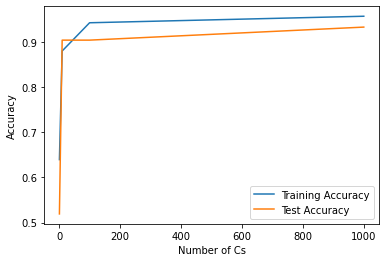

In [36]:
# Plotting Best C

plt.plot(Cs, train_acc, label="Training Accuracy")
plt.plot(Cs, test_acc, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of Cs")
plt.legend()
plt.savefig('svm_compare_model')

In [37]:
svm = SVC(C=1000)
svm.fit(train_features, train_labels)

train_score = svm.score(train_features, train_labels) * 100
test_score = svm.score(test_features, test_labels) * 100

print(f"Model Accuracy on Training Set : {str(train_score)[:5]}%")
print(f"Model Accuracy on Testing Set : {str(test_score)[:5]}%")

best_test_accuracy.append(test_score)

Model Accuracy on Training Set : 95.67%
Model Accuracy on Testing Set : 93.26%


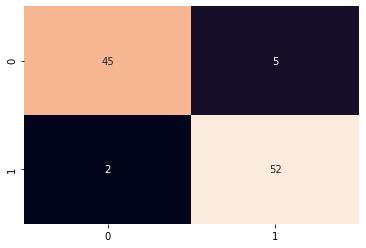

In [38]:
# Plotting Confusion Matrix
test_pred = svm.predict(test_features)
svmcm = confusion_matrix(test_labels, test_pred)
sns.heatmap(svmcm, cbar=False, annot=True)

plt.show()

In [39]:
# Classification Report
print(classification_report(test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        50
           1       0.91      0.96      0.94        54

    accuracy                           0.93       104
   macro avg       0.93      0.93      0.93       104
weighted avg       0.93      0.93      0.93       104



Best Accuracy Achieved : 97.11 %


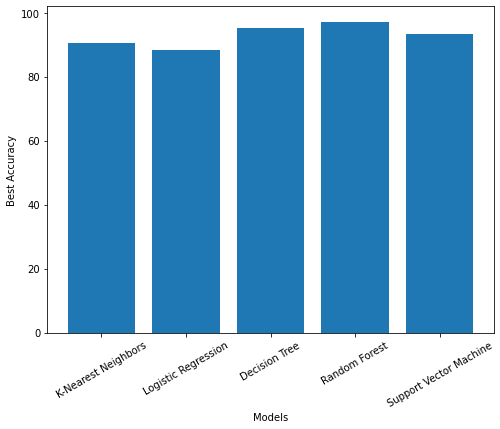

In [40]:
plt.figure(figsize=(8,6))
plt.bar(models, best_test_accuracy, align='center')
plt.xlabel("Models")
plt.xticks(rotation=30)
plt.ylabel("Best Accuracy")

print(f'Best Accuracy Achieved : {str(max(best_test_accuracy))[:5]} %')

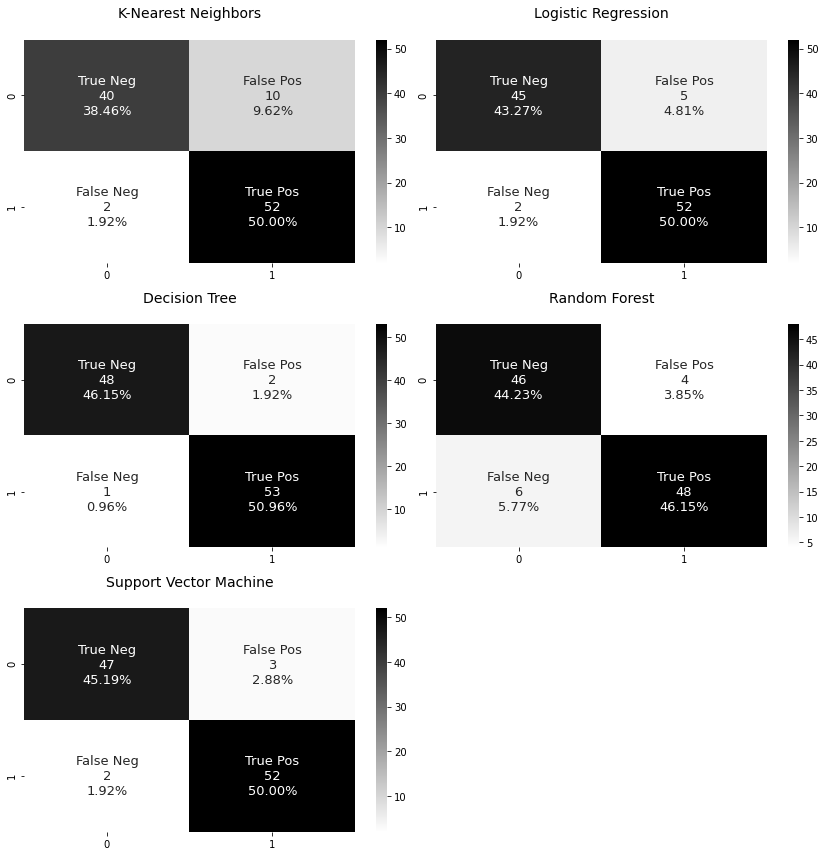

In [41]:
plt.figure(figsize=(12,12))
cmtitl = ["K-Nearest Neighbors", "Logistic Regression", "Decision Tree", "Random Forest", "Support Vector Machine"]
cms = [lrcm,svmcm,rfccm,knncm,dtccm]
num=0
for x in cms:
    plt.subplot(3,2,num+1,)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in x.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in x.flatten()/np.sum(svmcm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in   zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(x, annot=labels, annot_kws={"fontsize":13}, fmt='', cmap='binary')
    plt.title(f'{cmtitl[num]}\n',fontsize=14)
    num += 1
    plt.tight_layout()
plt.show()

In [46]:

import numpy as np
def plot_feature_importances_diabetes(model):
 plt.figure(figsize=(16,6))
 n_features = 17
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), diabetes_features)
 plt.xlabel("Feature importance")
 plt.ylabel("Feature")
 plt.ylim(-1, n_features)


In [48]:
diabetes_features = [x for i,x in enumerate(df.columns) if i!=8]
print("Feature importances:\n{}".format(RandomForestClassifier.feature_importances_))

Feature importances:


TypeError: unsupported operand type(s) for +: 'int' and 'property'

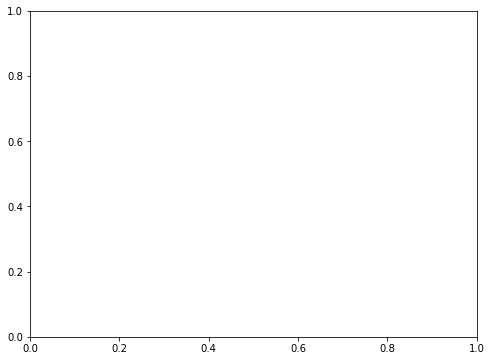

In [45]:
plot_feature_importances_diabetes(RandomForestClassifier)

In [ ]:
import joblib

joblib.dump(knn, 'models\\knn_model.pkl')
joblib.dump(logreg, 'models\\logreg_model.pkl')
joblib.dump(tree, 'models\\tree_model.pkl')
joblib.dump(rf, 'models\\rf_model.pkl')
joblib.dump(svm, 'models\\svm_model.pkl')

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(max_depth=4, random_state = 10) 
model.fit(train_features, train_labels)


In [ ]:
from sklearn.metrics import accuracy_score
pred_cv = model.predict(test_features)
accuracy_score(test_labels,pred_cv)


In [ ]:
pred_train = model.predict(train_features)
accuracy_score(train_labels,pred_train)

In [ ]:
# saving the model 
import pickle 
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()

In [ ]:
https://github.com/thatfreakcoder/diabetes-risk-prediction-notebook/blob/master/diabetes.ipynb